# Comparing the Different Regression Models

## A - Using the original dataset with no derived features

## A1 - Import and Data Preparation

In [40]:
# importing libraries
import seaborn as sns #for grouped bar chart
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

#loading dataset
df = pd.read_csv("public_cases.csv")

#selecting input and output columns
x = df[['trip_duration_days', 'miles_traveled', 'total_receipts_amount']]
y = df['expected_output']

#splitting data into training (750) and test sets(250)
#usx the same random seed value 42, the random number generator produces the same sequence of numbers, resulting in the same random processes, ie training and test data are always same.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

## A2 - Linear Regression Models Generation

### I - Simple Linear Regression

In [11]:
#creating the model and storx in object/var lr
lr = LinearRegression()

# fitting or training the model. .fit() finds the best straight-line equation, telling the model how to make future predictions
lr.fit(x_train, y_train)

# predicting on the test data. model uses what it learned from the training data to make predictions on new, unseen data x_test. those predictions are stored in the variable y_pred_lr.
y_pred_lr = lr.predict(x_test)

#Evaluating
print("Simple Linear Regression:")
print("How well it explains the variance (1 = perfect predictions, 0 = bad) R2:", r2_score(y_test, y_pred_lr))  #function (r2_score) calculates how well the model explains the variation in the test data.
print("Average prediction error in $, (lower is good here). RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr))) #RMSE - Root mean square error

Simple Linear Regression:
How well it explains the variance (1 = perfect predictions, 0 = bad) R2: 0.8060371019496313
Average prediction error in $, (lower is good here). RMSE: 201.3658947644262


### II - Polynomial Regression

In [13]:
# Step 1: Create polynomial features (degree=2 means squared + interactions)
poly = PolynomialFeatures(degree=2, include_bias=False)
x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.transform(x_test)

# Step 2: Create and fit model
poly_lr = LinearRegression()
poly_lr.fit(x_poly_train, y_train)

# Step 3: Predict
y_pred_poly = poly_lr.predict(x_poly_test)

# Step 4: Evaluate
print("\nPolynomial Regression (Degree 2):")
print("R²:", r2_score(y_test, y_pred_poly))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_poly)))


Polynomial Regression (Degree 2):
R²: 0.9060439103665427
RMSE: 140.14869261990864


### III - Ridge Regression

In [16]:
# Scale features to make regularization fair
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(x_train_scaled, y_train)
y_pred_ridge = ridge.predict(x_test_scaled)

# Evaluatx
print("\nRidge Regression:")
print("R²:", r2_score(y_test, y_pred_ridge))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))


Ridge Regression:
R²: 0.8061358179854234
RMSE: 201.31464637384317


### IV - Lasso Regression

In [18]:
# Scale features to make regularization fair
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(x_train_scaled, y_train)
y_pred_lasso = lasso.predict(x_test_scaled)

# Evaluatx
print("\nLasso Regression:")
print("R²:", r2_score(y_test, y_pred_lasso))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))



Lasso Regression:
R²: 0.8060745815830918
RMSE: 201.3464387637617


## A3 - Regression Model Output Comparisons Using the Original Dataset

In [57]:
# Creatx a DataFrame (table)
data1 = {
    'Model': ['Simple Linear Regression', 'Polynomial Regression (Degree 2)', 'Ridge Regression', 'Lasso Regression'],
    'Variance': ['0.8060371019496313', '0.9060439103665427', '0.8061358179854234', '0.8060745815830918'],
    'Error in $': ['201.3658947644262', '140.14869261990864', '201.31464637384317', '201.3464387637617']
}

df1 = pd.DataFrame(data1)

# Display the DataFrame
df1.style.set_caption("Table 1: Regression Model Output Comparisons Using the Original Dataset")

,Model,Variance,Error in $
0,Simple Linear Regression,0.8060371019496313,201.3658947644262
1,Polynomial Regression (Degree 2),0.9060439103665427,140.14869261990864
2,Ridge Regression,0.8061358179854234,201.31464637384317
3,Lasso Regression,0.8060745815830918,201.3464387637617


## B - Using the dataset with derived features

## B1 - Import and Data Preparation

In [21]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

#loading dataset
df = pd.read_csv("public_cases_derived_features.csv")

#selecting input and output columns
x = df[['trip_duration_days', 'miles_traveled', 'total_receipts_amount', 'miles_per_day', 'spend_per_day', 'spend_per_mile']]
y = df['expected_output']

#splitting data into training (750) and test sets(250)
#usx the same random seed value 42, the random number generator produces the same sequence of numbers, resulting in the same random processes, ie training and test data are always same.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

## B2 - Linear Regression Models Generation

### I - Simple Linear Regression

In [23]:
#creating the model and storx in object/var lr
lr = LinearRegression()

# fitting or training the model. .fit() finds the best straight-line equation, telling the model how to make future predictions
lr.fit(x_train, y_train)

# predicting on the test data. model uses what it learned from the training data to make predictions on new, unseen data x_test. those predictions are stored in the variable y_pred_lr.
y_pred_lr = lr.predict(x_test)

#Evaluating
print("Simple Linear Regression:")
print("How well it explains the variance (1 = perfect predictions, 0 = bad) R2:", r2_score(y_test, y_pred_lr))  #function (r2_score) calculates how well the model explains the variation in the test data.
print("Average prediction error in $, (lower is good here). RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

Simple Linear Regression:
How well it explains the variance (1 = perfect predictions, 0 = bad) R2: 0.8117789421792366
Average prediction error in $, (lower is good here). RMSE: 198.36300963962938


### II - Polynomial Regression

In [24]:
# Step 1: Create polynomial features (degree=2 means squared + interactions)
poly = PolynomialFeatures(degree=2, include_bias=False)
x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.transform(x_test)

# Step 2: Create and fit model
poly_lr = LinearRegression()
poly_lr.fit(x_poly_train, y_train)

# Step 3: Predict
y_pred_poly = poly_lr.predict(x_poly_test)

# Step 4: Evaluate
print("\nPolynomial Regression (Degree 2):")
print("R²:", r2_score(y_test, y_pred_poly))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_poly)))


Polynomial Regression (Degree 2):
R²: 0.9167655407830313
RMSE: 131.9101350979928


## III - Ridge Regression

In [25]:
# Scale features to make regularization fair
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(x_train_scaled, y_train)
y_pred_ridge = ridge.predict(x_test_scaled)

# Evaluatx
print("\nRidge Regression:")
print("R²:", r2_score(y_test, y_pred_ridge))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))


Ridge Regression:
R²: 0.8119154714345249
RMSE: 198.29105364480938


### IV - Lasso Regression

In [27]:
# Scale features to make regularization fair
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(x_train_scaled, y_train)
y_pred_lasso = lasso.predict(x_test_scaled)

# Evaluatx
print("\nLasso Regression:")
print("R²:", r2_score(y_test, y_pred_lasso))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))



Lasso Regression:
R²: 0.8118733251322711
RMSE: 198.31326909926884


## B3 - Regression Model Output Comparisons Using the Dataset with Derived Features

In [58]:
# Creatx a DataFrame (table)
data2 = {
    'Model': ['Simple Linear Regression', 'Polynomial Regression (Degree 2)', 'Ridge Regression', 'Lasso Regression'],
    'Variance': ['0.8117789421792366', '0.9167655407830313', '0.8119154714345249', '0.8118733251322711'],
    'Error in $': ['198.36300963962938', '131.9101350979928', '198.29105364480938', '198.31326909926884']
}

df2 = pd.DataFrame(data2)

# Display the DataFrame
df2.style.set_caption("Table 2: Regression Model Output Comparisons Using the Dataset with Derived Features")

,Model,Variance,Error in $
0,Simple Linear Regression,0.8117789421792366,198.36300963962938
1,Polynomial Regression (Degree 2),0.9167655407830313,131.9101350979928
2,Ridge Regression,0.8119154714345249,198.29105364480938
3,Lasso Regression,0.8118733251322711,198.31326909926884


# Conclusion - Regression Model Comparison

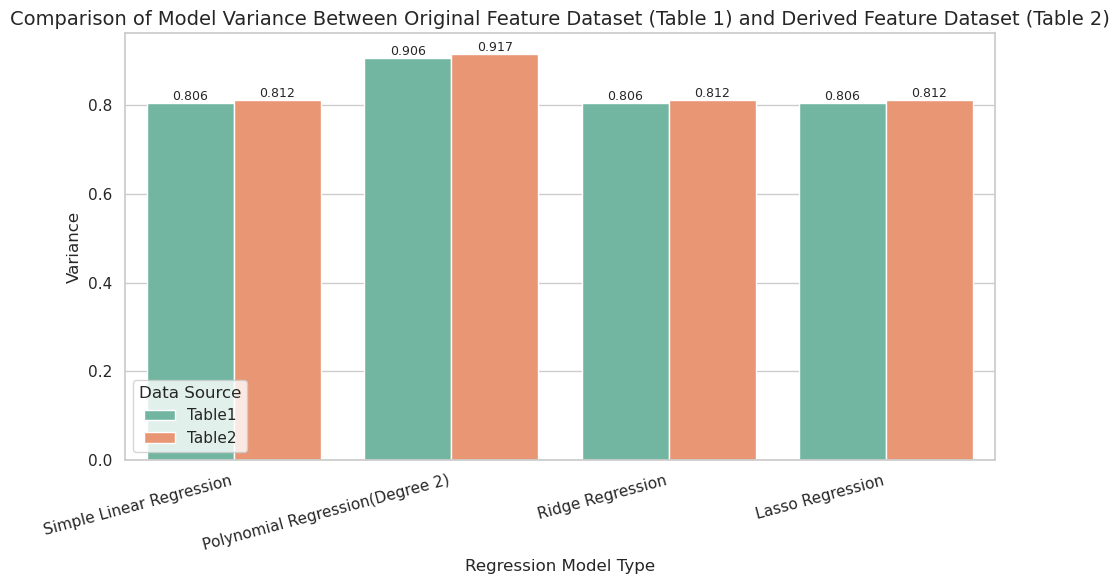

In [56]:
df = pd.read_csv('linear_regression_variance.csv')

# === Reshapx the data for easier plotting ===
# Convert from wide format (Table1, Table2) to long format
df_long = df.melt(id_vars='Model', var_name='Table', value_name='Variance')

# === Settx up plot style ===
sns.set(style="whitegrid", palette="Set2")

# === Creatx grouped bar chart ===
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Model',
    y='Variance',
    hue='Table',
    data=df_long
)

# === Customiz appearance ===
plt.title('Comparison of Model Variance Between Original Feature Dataset (Table 1) and Derived Feature Dataset (Table 2)', fontsize=14)
plt.xlabel('Regression Model Type', fontsize=12)
plt.ylabel('Variance', fontsize=12)
plt.xticks(rotation=15, ha='right')
plt.ylim(0, None)  # Start Y-axis at 0
plt.legend(title='Data Source')

# Optional: show values on top of bars
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.3f', label_type='edge', fontsize=9)

plt.tight_layout()
plt.show()


The comparison between Table 1 (original dataset) and Table 2 (dataset with derived features) shows that incorporating the derived features consistently improved the model performance across all regression types.

While the variance values in Table 1 ranged roughly between 0.806 and 0.906, the corresponding values in Table 2 increased slightly, ranging from 0.811 to 0.916, indicating better model fit and reduced unexplained variance after feature engineering.

Among all models, the Polynomial Regression (Degree 2) model achieved the highest variance (≈0.917) when using the derived features dataset suggesting it captures the non-linear relationships between trip characteristics and reimbursement amounts more effectively than the linear, Ridge, or Lasso models.

However, this improvement should be interpreted cautiously. The results are not yet conclusive since the dataset and evaluation metrics are limited to variance alone. Further validation with additional metrics and testing on other model types will be necessary to confirm whether this pattern holds consistently.